In [1]:
import pandas as pd
import numpy as np
import warnings

import seaborn as sns
import matplotlib.pyplot as plt

Şimdi, ilk regresyon modelinizi tasarlama sırası sizde. Bu bölümde, Kaggle'ın "Ev Fiyatları" veri kümesini kullanacaksınız. Bu veri kümesi, Ames/Iowa'da ki konutların birçok yönünü açıklayan 79 değişkenden oluşmaktadır. Göreviniz bu verileri kullanarak, evlerin fiyatlarını tahmin etmek olacak. Verileri ve değişkenlerin açıklamalarını burada bulabilirsiniz: Ev Fiyatları

***Verileri inceleyin ve gerekli tüm verileri temizleyin.**

***Verileri araştırın ve konut fiyatlarının tahmininde faydalı olacağını düşündüğünüz bazı değişkenleri bulun.**

***Bu özellikleri kullanarak ilk modelinizi oluşturun ve OLS kullanarak parametreleri tahmin edin.**

In [2]:
house_Prices = pd.read_csv("data/train.csv")

In [30]:
house_Prices

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [4]:
house_Prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
toplam = house_Prices.isnull().sum()

yuzde = (house_Prices.isnull().sum()/house_Prices.isnull().count())

In [6]:
Null_degerler = pd.concat([toplam, yuzde], axis=1, keys = ['toplam', 'yuzde'])
Null_degerler

,toplam,yuzde
Id,0,0.000000
MSSubClass,0,0.000000
MSZoning,0,0.000000
LotFrontage,259,0.177397
LotArea,0,0.000000
Street,0,0.000000
Alley,1369,0.937671
LotShape,0,0.000000
LandContour,0,0.000000
Utilities,0,0.000000


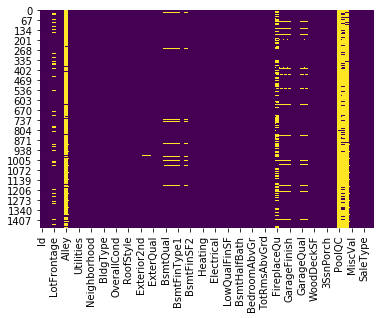

In [7]:
sns.heatmap(house_Prices.isnull(), cbar= False, cmap='viridis')

In [8]:
Bos_ham_hucre_toplami = house_Prices.isnull().sum()*100/len(house_Prices)
Bos_ham_hucre_toplami

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
                   ...    
BedroomAbvGr      0.000000
KitchenAbvGr      0.000000
KitchenQual       0.000000
TotRmsAbvGrd      0.000000
Functional        0.000000
Fireplaces        0.000000
F

In [9]:
house_Prices.PoolQC.value_counts().head()

Gd    3
Fa    2
Ex    2
Name: PoolQC, dtype: int64

In [10]:
house_Prices.LotFrontage.value_counts().head()

60.0    143
70.0     70
80.0     69
50.0     57
75.0     53
Name: LotFrontage, dtype: int64

In [11]:
house_Prices.Alley.value_counts().head()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [12]:
house_Prices.MasVnrType.value_counts().head()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [13]:
house_Prices.MasVnrArea.value_counts().head()

0.0      861
72.0       8
180.0      8
108.0      8
120.0      7
Name: MasVnrArea, dtype: int64

In [14]:
house_Prices.FireplaceQu.value_counts().head()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [15]:
house_Prices.GarageType.value_counts().head()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
Name: GarageType, dtype: int64

In [16]:
house_Prices.GarageYrBlt.value_counts().head()

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
Name: GarageYrBlt, dtype: int64

In [17]:
house_Prices.GarageFinish.value_counts().head()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [18]:
house_Prices.GarageQual.value_counts().head()

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

In [19]:
house_Prices.GarageCond.value_counts().head()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [20]:
house_Prices.Fence.value_counts().head()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [21]:
house_Prices.MiscFeature.value_counts().head()

Shed    49
Othr     2
Gar2     2
TenC     1
Name: MiscFeature, dtype: int64

In [22]:
house_Prices_filled = house_Prices.copy()

In [23]:
sutunlar = house_Prices_filled.columns
sutunlar

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [24]:
fill_list_int = ['LotFrontage', 'MasVnrArea',  'GarageYrBlt'] 

In [25]:
for col in fill_list_int:
    house_Prices_filled.loc[:,col].interpolate(inplace=True)

In [26]:
enterpolate_snrsi__hucre_toplami = house_Prices_filled[['LotFrontage','MasVnrArea','GarageYrBlt']].isnull().sum()*100/len(house_Prices)
enterpolate_snrsi__hucre_toplami


LotFrontage    0.0
MasVnrArea     0.0
GarageYrBlt    0.0
dtype: float64

Alley, MiscFeature and PoolQC have high number of missing values so I decided to drop these coloumns

In [35]:
fill_list_str = ['MasVnrType', 'FireplaceQu', 'GarageType', 'GarageFinish',
                 'GarageQual','GarageCond', 'Fence']

In [37]:
house_Prices_filled['MasVnrType'].fillna(house_Prices_filled['MasVnrType'].value_counts().index[0],inplace=True)
house_Prices_filled['FireplaceQu'].fillna(house_Prices_filled['FireplaceQu'].value_counts().index[0],inplace=True)
house_Prices_filled['GarageType'].fillna(house_Prices_filled['GarageType'].value_counts().index[0],inplace=True)
house_Prices_filled['GarageFinish'].fillna(house_Prices_filled['GarageFinish'].value_counts().index[0],inplace=True)
house_Prices_filled['GarageQual'].fillna(house_Prices_filled['GarageQual'].value_counts().index[0],inplace=True)
house_Prices_filled['GarageCond'].fillna(house_Prices_filled['GarageCond'].value_counts().index[0],inplace=True)
house_Prices_filled['Fence'].fillna(house_Prices_filled['Fence'].value_counts().index[0],inplace=True)

In [40]:
house_Prices_droppped =  house_Prices_filled.drop(['Alley','MiscFeature', 'PoolQC'], axis =1 )

In [45]:
house_Prices_filled.shape

(1460, 81)

In [44]:
house_Prices_droppped.shape

(1460, 78)

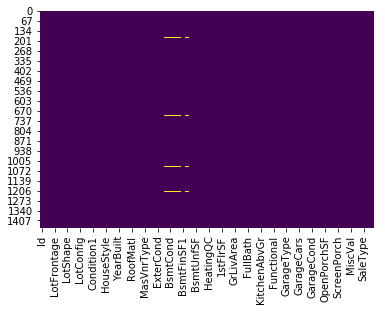

In [42]:
sns.heatmap(house_Prices_droppped.isnull(),cbar= False, cmap='viridis' )

In [29]:
str_list = house_Prices_filled.Alley

for i in range(0, len(str_list)):
    if pd.isnull(str_list[i]):
        str_list[i] = str_list[i-1]

KeyError: -1